In [1]:
#Import required libraries
%matplotlib inline
import numpy as np
import os
from geopandas import GeoSeries, GeoDataFrame, read_file, gpd
import pandas as pd
from matplotlib import pyplot as plt
import IPython

import cartopy.crs as ccrs # for projection

In [2]:
#Load EEZ data from shapefile
input_file = 'eez_v12_0_360.shp'

if os.path.exists(input_file):
    print('Input file:', input_file)
else:
    print('Please download the data or fix the path!')

Input file: eez_v12_0_360.shp


In [3]:
#Read data and take a look at the column headers etc
eez_data = gpd.read_file(input_file)
eez_data.head(1)

,MRGID,GEONAME,MRGID_TER1,POL_TYPE,MRGID_SOV1,TERRITORY1,ISO_TER1,SOVEREIGN1,MRGID_TER2,MRGID_SOV2,...,ISO_SOV1,ISO_SOV2,ISO_SOV3,UN_SOV1,UN_SOV2,UN_SOV3,UN_TER1,UN_TER2,UN_TER3,geometry
0,8444,United States Exclusive Economic Zone (America...,8670.0,200NM,2204,American Samoa,ASM,United States,NaN,NaN,...,USA,None,None,840,NaN,NaN,16.0,NaN,NaN,"POLYGON ((193.36 -17.555, 193.35 -17.552, 193...."


In [4]:
#Reduce dataset to only necessary columns
eez_data = eez_data[['SOVEREIGN1','geometry']]

In [5]:
eez_data.head()

,SOVEREIGN1,geometry
0,United States,"POLYGON ((193.36 -17.555, 193.35 -17.552, 193...."
1,United Kingdom,"POLYGON ((349.07 -7.8893, 349.07 -7.9039, 349...."
2,New Zealand,"POLYGON ((201.62 -6.3777, 201.9 -6.5611, 202.3..."
3,United Kingdom,"POLYGON ((298.38 -53.782, 298.33 -53.759, 298...."
4,France,"MULTIPOLYGON (((224.07 -7.9013, 224.07 -7.903,..."


<Axes: >

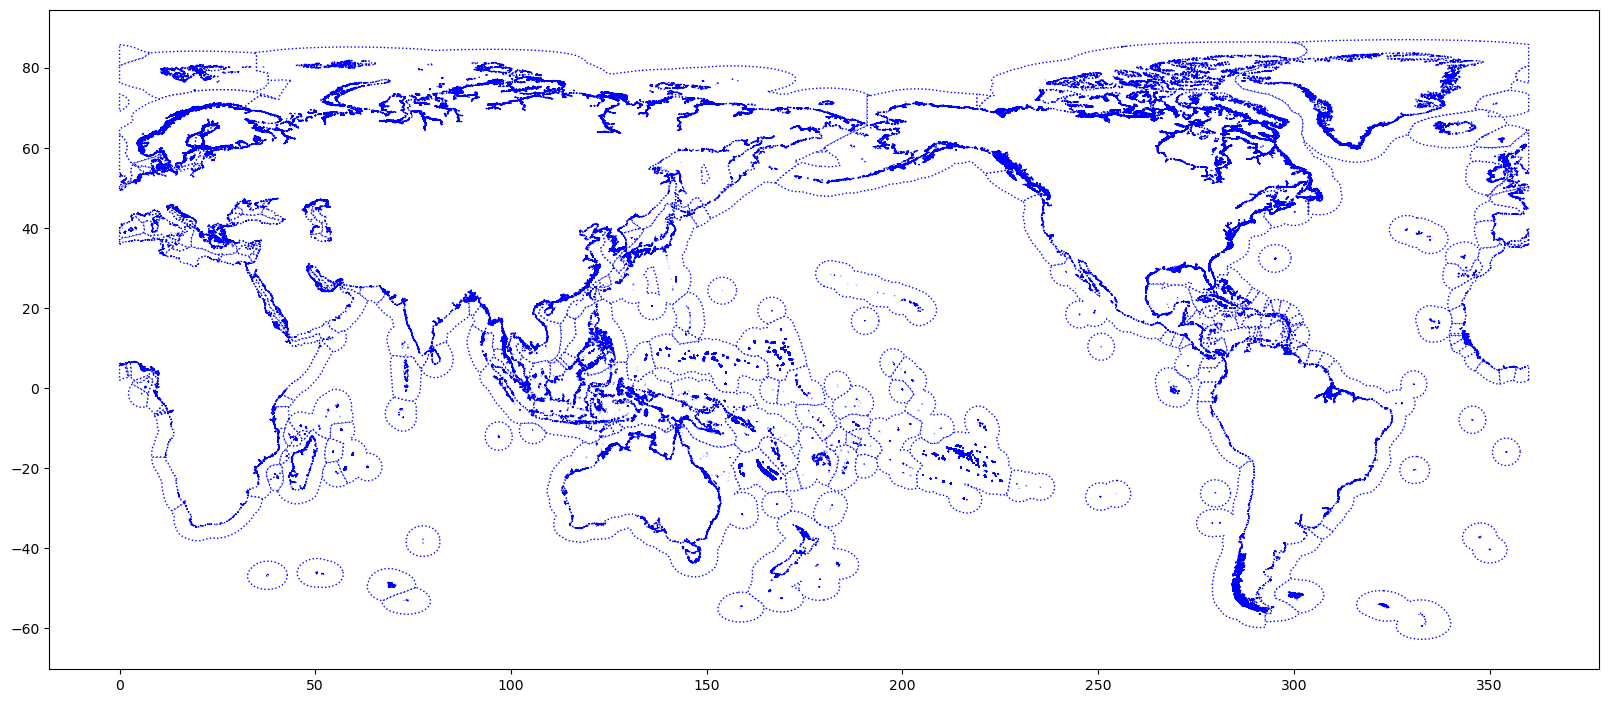

In [6]:
#Plot data to see what it looks like initially
eez_data.plot(figsize=(20,15), color='white', edgecolor='blue',linestyle=":")


In [6]:
#Cut down EEZ data to only include EEZs within the Arctic Circle.
arctic_eez = eez_data.cx[:,60:]

In [87]:
#Dissolve EEZ boundaries by sovereign country so we end up with one EEZ polygon for each Arctic State
cntry_eez = arctic_eez.dissolve(by='SOVEREIGN1', aggfunc='sum', as_index=False, sort=False)

In [88]:
cntry_eez.head()

,SOVEREIGN1,geometry
0,Denmark,"MULTIPOLYGON (((0 85.761, 0.0010649 85.761, 0...."
1,Iceland,"POLYGON ((347.84 69.578, 347.86 69.58, 347.86 ..."
2,United Kingdom,"MULTIPOLYGON (((360 53.541, 360 53.541, 360 53..."
3,Canada,"MULTIPOLYGON (((227.14 68.965, 227.15 68.965, ..."
4,Finland,"POLYGON ((27.36 60.488, 27.364 60.49, 27.371 6..."


In [89]:
#Check the CRS for the EEZ data
cntry_eez.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [90]:
#Reproject data onto North Pole Azimuthal Equidistant CRS for accurate plotting: https://gis.stackexchange.com/questions/387091/how-to-plot-coordinate-system-from-epsg-4326-on-north-pole-centered-map-in-pytho
cntry_eez_new = cntry_eez.to_crs('+proj=aeqd +lat_0=90')

In [91]:
cntry_eez_new.crs

<Projected CRS: +proj=aeqd +lat_0=90 +type=crs>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Modified Azimuthal Equidistant
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<GeoAxes: >

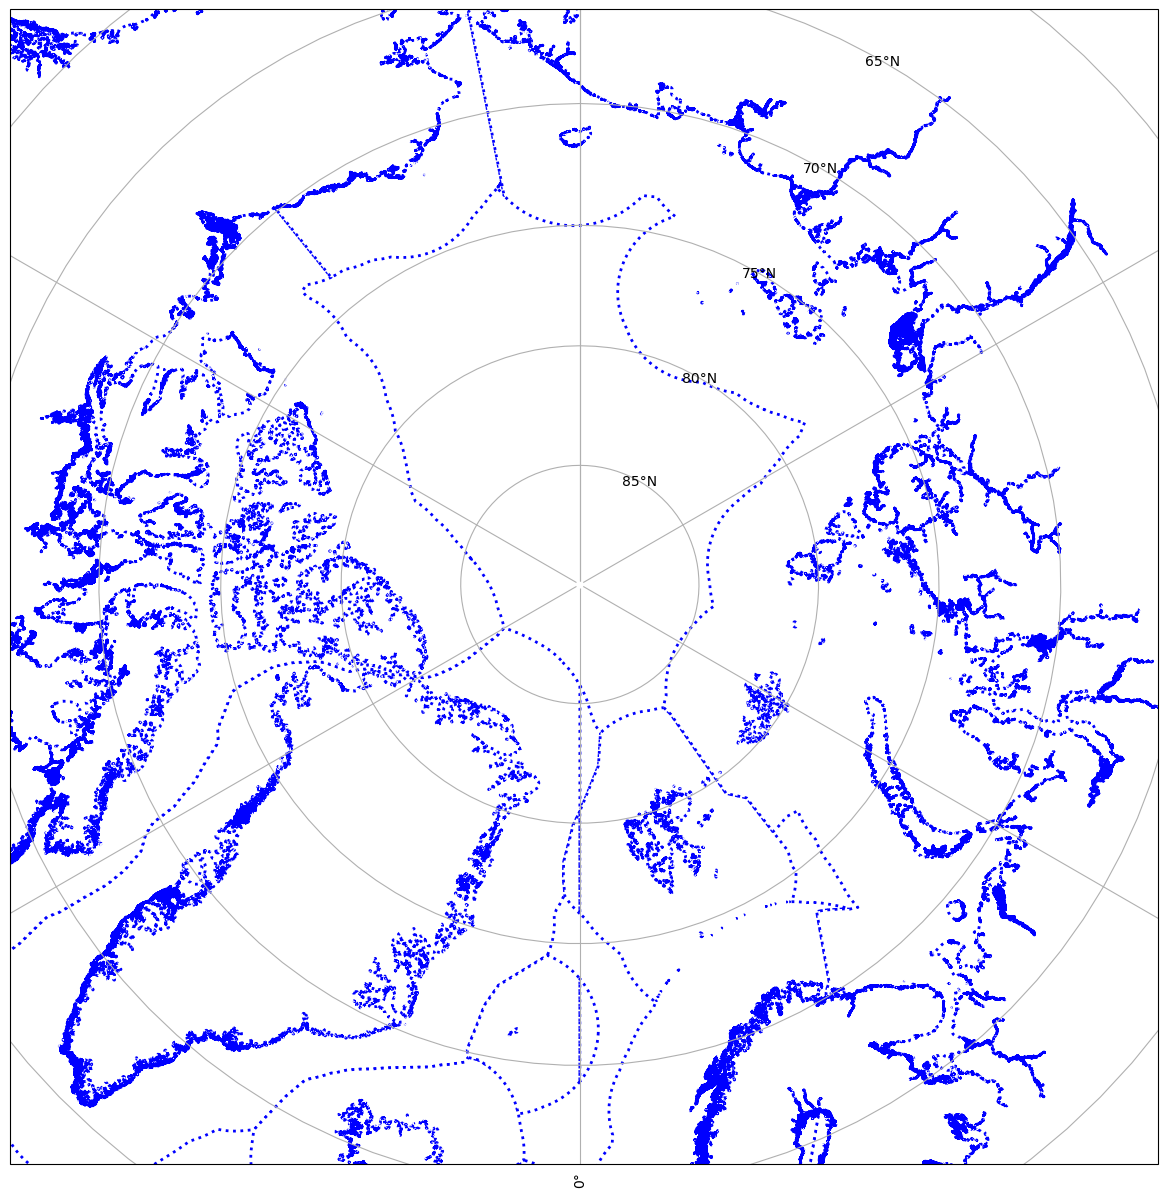

In [28]:
#Define map projection
proj=ccrs.NorthPolarStereo(central_longitude=0)

#Create a figure with an axes object on which we will plot. Pass the projection to that axes.
fig, ax = plt.subplots(figsize=(15,15),subplot_kw=dict(projection=proj))

#Zoom in on Arctic Circle
ax.set_extent([0, 359, 66, 90], ccrs.PlateCarree())

#Add gridlines
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

#Plot Arctic EEZ data on North Polar Stereo projection
cntry_eez_new.plot(ax=ax, color='white', edgecolor='blue',linestyle=":", lw=2)

In [12]:
#Load ice extent data from shapefile
input_file2 = 'extent_N_202309_polyline_v3.0.shp'

if os.path.exists(input_file2):
    print('Input file:', input_file2)
else:
    print('Please download the data or fix the path!')

Input file: extent_N_202309_polyline_v3.0.shp


In [38]:
#Read data and take a look at the column headers etc
ice_extent09 = gpd.read_file(input_file2)
ice_extent09

,FID,geometry
0,0,"MULTILINESTRING ((1.25e+05 1.42e+06, 3.25e+05 ..."


In [14]:
#Reproject to same CRS as EEZ data
ice_extent09_new = ice_extent09.to_crs('+proj=aeqd +lat_0=90')

<GeoAxes: title={'center': 'Sept 2023 Sea Ice Extent over Arctic EEZ Boundaries'}>

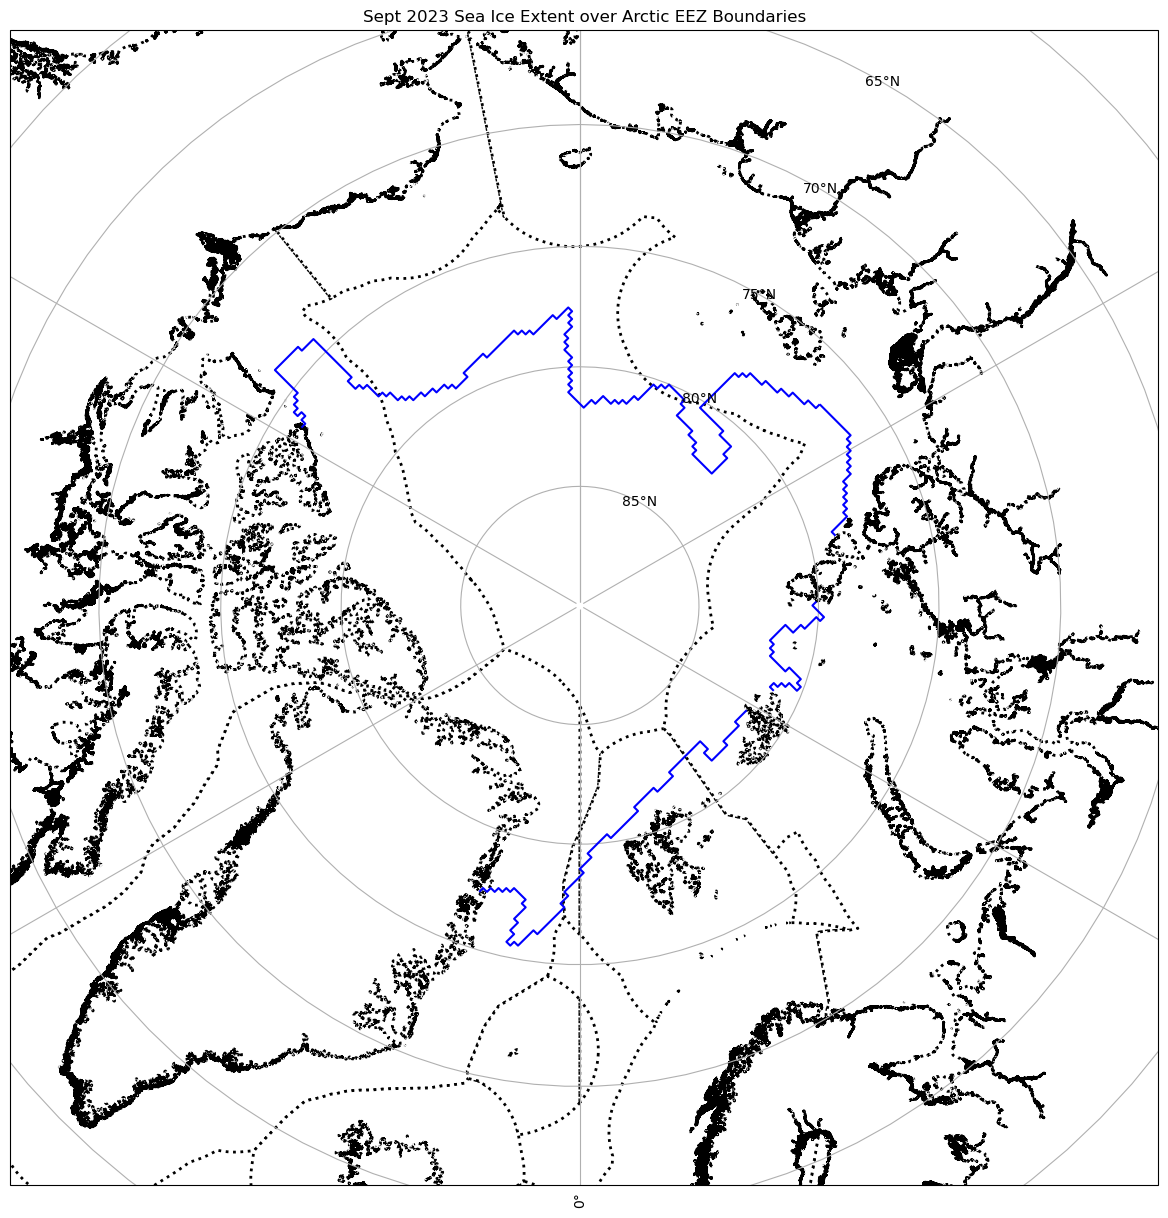

In [32]:
#Define map projection
proj=ccrs.NorthPolarStereo(central_longitude=0)

#Create a figure with an axes object on which we will plot. Pass the projection to that axes.
fig, ax = plt.subplots(figsize=(15,15),subplot_kw=dict(projection=proj))

#Zoom in on Arctic Circle
ax.set_extent([0, 359, 66, 90], ccrs.PlateCarree())

#Add gridlines
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

#Add title
ax.set_title('Sept 2023 Sea Ice Extent over Arctic EEZ Boundaries')

#Plot Arctic EEZ and Sea Ice Extent data on North Polar Stereo projection
cntry_eez_new.plot(ax=ax, color='white', edgecolor='black',linestyle=":", lw=2)
ice_extent09_new.plot(ax=ax, color='blue')

Now that we have EEZ boundaries and Sea Ice Extent for Sept 2023, we want to calculate % ice free area within each country's EEZ so we can create a choropleth map indicating ice free area for each country.

In [15]:
#Define ice extent geometry.
# Convex hull is much less accurate but since the polygon is not closed, it was the only way to be abe to continue trying to fins intersections
# between ice extent and EEZ polygons. Buffer command removed a geometry self-intersection issue without changing the actaul shape.
ice_extent09_geo = ice_extent09_new.convex_hull.buffer(0)
type(ice_extent09_geo)

geopandas.geoseries.GeoSeries

<Axes: >

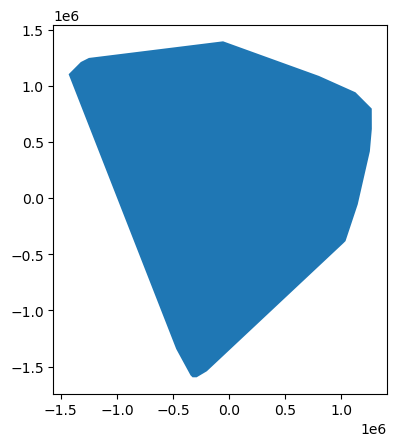

In [82]:
#See what the new ice extent geometry we defined looks like
ice_extent09_geo.plot()

In [86]:
#Create GeoDataframe to concat onto cntry EEZ dataframe to ease column calculations
ice_extent09_geo1 = ice_extent09_new.convex_hull.buffer(0)
ice_extent09_geo1 = ice_extent09_geo1.repeat(9) #Repeat the GeoSeries, ice ppolygon 9 times to match rows in EEZ dataset
ice_extent_gdf = gpd.GeoDataFrame(ice_extent09_geo1, geometry=ice_extent09_geo1.geometry) #Convert it to a GeoDataframe
ice_extent_gdf = ice_extent_gdf.reset_index() #Reset index
ice_extent_gdf = ice_extent_gdf.drop(['index',0], axis=1) #Drop extraneous columns
ice_extent_gdf = ice_extent_gdf.rename_geometry('ice_geo') #Rename geometry so it does not get dropped on the merge
ice_extent_gdf

,ice_geo
0,"POLYGON ((-2.9e+05 -1.6e+06, -3.26e+05 -1.6e+0..."
1,"POLYGON ((-2.9e+05 -1.6e+06, -3.26e+05 -1.6e+0..."
2,"POLYGON ((-2.9e+05 -1.6e+06, -3.26e+05 -1.6e+0..."
3,"POLYGON ((-2.9e+05 -1.6e+06, -3.26e+05 -1.6e+0..."
4,"POLYGON ((-2.9e+05 -1.6e+06, -3.26e+05 -1.6e+0..."
5,"POLYGON ((-2.9e+05 -1.6e+06, -3.26e+05 -1.6e+0..."
6,"POLYGON ((-2.9e+05 -1.6e+06, -3.26e+05 -1.6e+0..."
7,"POLYGON ((-2.9e+05 -1.6e+06, -3.26e+05 -1.6e+0..."
8,"POLYGON ((-2.9e+05 -1.6e+06, -3.26e+05 -1.6e+0..."


In [98]:
#Combine dataframes for ease of column calculations next
all_data = pd.concat([cntry_eez_new, ice_extent_gdf], axis=1)
all_data

,SOVEREIGN1,geometry,ice_geo
0,Denmark,"MULTIPOLYGON (((0 -4.73e+05, 8.8 -4.74e+05, 11...","POLYGON ((-2.9e+05 -1.6e+06, -3.26e+05 -1.6e+0..."
1,Iceland,"POLYGON ((-4.8e+05 -2.23e+06, -4.8e+05 -2.23e+...","POLYGON ((-2.9e+05 -1.6e+06, -3.26e+05 -1.6e+0..."
2,United Kingdom,"MULTIPOLYGON (((0 -4.07e+06, -8.92e-05 -4.07e+...","POLYGON ((-2.9e+05 -1.6e+06, -3.26e+05 -1.6e+0..."
3,Canada,"MULTIPOLYGON (((-1.72e+06 1.6e+06, -1.72e+06 1...","POLYGON ((-2.9e+05 -1.6e+06, -3.26e+05 -1.6e+0..."
4,Finland,"POLYGON ((1.51e+06 -2.93e+06, 1.51e+06 -2.92e+...","POLYGON ((-2.9e+05 -1.6e+06, -3.26e+05 -1.6e+0..."
5,Sweden,"MULTIPOLYGON (((9.82e+05 -2.36e+06, 9.83e+05 -...","POLYGON ((-2.9e+05 -1.6e+06, -3.26e+05 -1.6e+0..."
6,United States,"POLYGON ((9.12e+05 4.23e+06, 9.29e+05 4.23e+06...","POLYGON ((-2.9e+05 -1.6e+06, -3.26e+05 -1.6e+0..."
7,Norway,"MULTIPOLYGON (((1.97e+05 -3.76e+06, 1.89e+05 -...","POLYGON ((-2.9e+05 -1.6e+06, -3.26e+05 -1.6e+0..."
8,Russia,"MULTIPOLYGON (((1.41e+06 -3.61e+06, 1.41e+06 -...","POLYGON ((-2.9e+05 -1.6e+06, -3.26e+05 -1.6e+0..."


In [99]:
#Perform column calculations to get to ice free percentage values for each EEZ
all_data['ice extent intersection'] = all_data.geometry.buffer(0).intersection(all_data.ice_geo)
all_data['intersection area'] = all_data['ice extent intersection'].area
all_data['total area'] = all_data.geometry.area
all_data['ice free area'] = all_data['total area'] - all_data['intersection area']
all_data['ice free percentage'] = all_data['ice free area']/all_data['total area']

In [101]:
all_data

,SOVEREIGN1,geometry,ice_geo,ice extent intersection,intersection area,total area,ice free area,ice free percentage
0,Denmark,"MULTIPOLYGON (((0 -4.73e+05, 8.8 -4.74e+05, 11...","POLYGON ((-2.9e+05 -1.6e+06, -3.26e+05 -1.6e+0...","POLYGON ((-8.04e+04 -3.64e+05, -8.03e+04 -3.65...",5.450565e+11,2.599752e+12,2.054695e+12,0.790343
1,Iceland,"POLYGON ((-4.8e+05 -2.23e+06, -4.8e+05 -2.23e+...","POLYGON ((-2.9e+05 -1.6e+06, -3.26e+05 -1.6e+0...",POLYGON EMPTY,0.000000e+00,8.228483e+11,8.228483e+11,1.000000
2,United Kingdom,"MULTIPOLYGON (((0 -4.07e+06, -8.92e-05 -4.07e+...","POLYGON ((-2.9e+05 -1.6e+06, -3.26e+05 -1.6e+0...",POLYGON EMPTY,0.000000e+00,7.724346e+11,7.724346e+11,1.000000
3,Canada,"MULTIPOLYGON (((-1.72e+06 1.6e+06, -1.72e+06 1...","POLYGON ((-2.9e+05 -1.6e+06, -3.26e+05 -1.6e+0...","MULTIPOLYGON (((-1.16e+06 1.26e+06, -1.16e+06 ...",6.697463e+11,6.053507e+12,5.383760e+12,0.889362
4,Finland,"POLYGON ((1.51e+06 -2.93e+06, 1.51e+06 -2.92e+...","POLYGON ((-2.9e+05 -1.6e+06, -3.26e+05 -1.6e+0...",POLYGON EMPTY,0.000000e+00,8.502396e+10,8.502396e+10,1.000000
5,Sweden,"MULTIPOLYGON (((9.82e+05 -2.36e+06, 9.83e+05 -...","POLYGON ((-2.9e+05 -1.6e+06, -3.26e+05 -1.6e+0...",POLYGON EMPTY,0.000000e+00,1.631665e+11,1.631665e+11,1.000000
6,United States,"POLYGON ((9.12e+05 4.23e+06, 9.29e+05 4.23e+06...","POLYGON ((-2.9e+05 -1.6e+06, -3.26e+05 -1.6e+0...",POLYGON EMPTY,0.000000e+00,3.907873e+12,3.907873e+12,1.000000
7,Norway,"MULTIPOLYGON (((1.97e+05 -3.76e+06, 1.89e+05 -...","POLYGON ((-2.9e+05 -1.6e+06, -3.26e+05 -1.6e+0...","MULTIPOLYGON (((-7.34e+04 -1.42e+06, -7.76e+04...",2.401747e+11,2.062109e+12,1.821935e+12,0.883530
8,Russia,"MULTIPOLYGON (((1.41e+06 -3.61e+06, 1.41e+06 -...","POLYGON ((-2.9e+05 -1.6e+06, -3.26e+05 -1.6e+0...","MULTIPOLYGON (((5.73e+05 -8.18e+05, 5.56e+05 -...",9.107872e+11,8.037188e+12,7.126400e+12,0.886678


<GeoAxes: title={'center': 'Sept 2023 Ice Free Area over Arctic EEZ Boundaries'}>

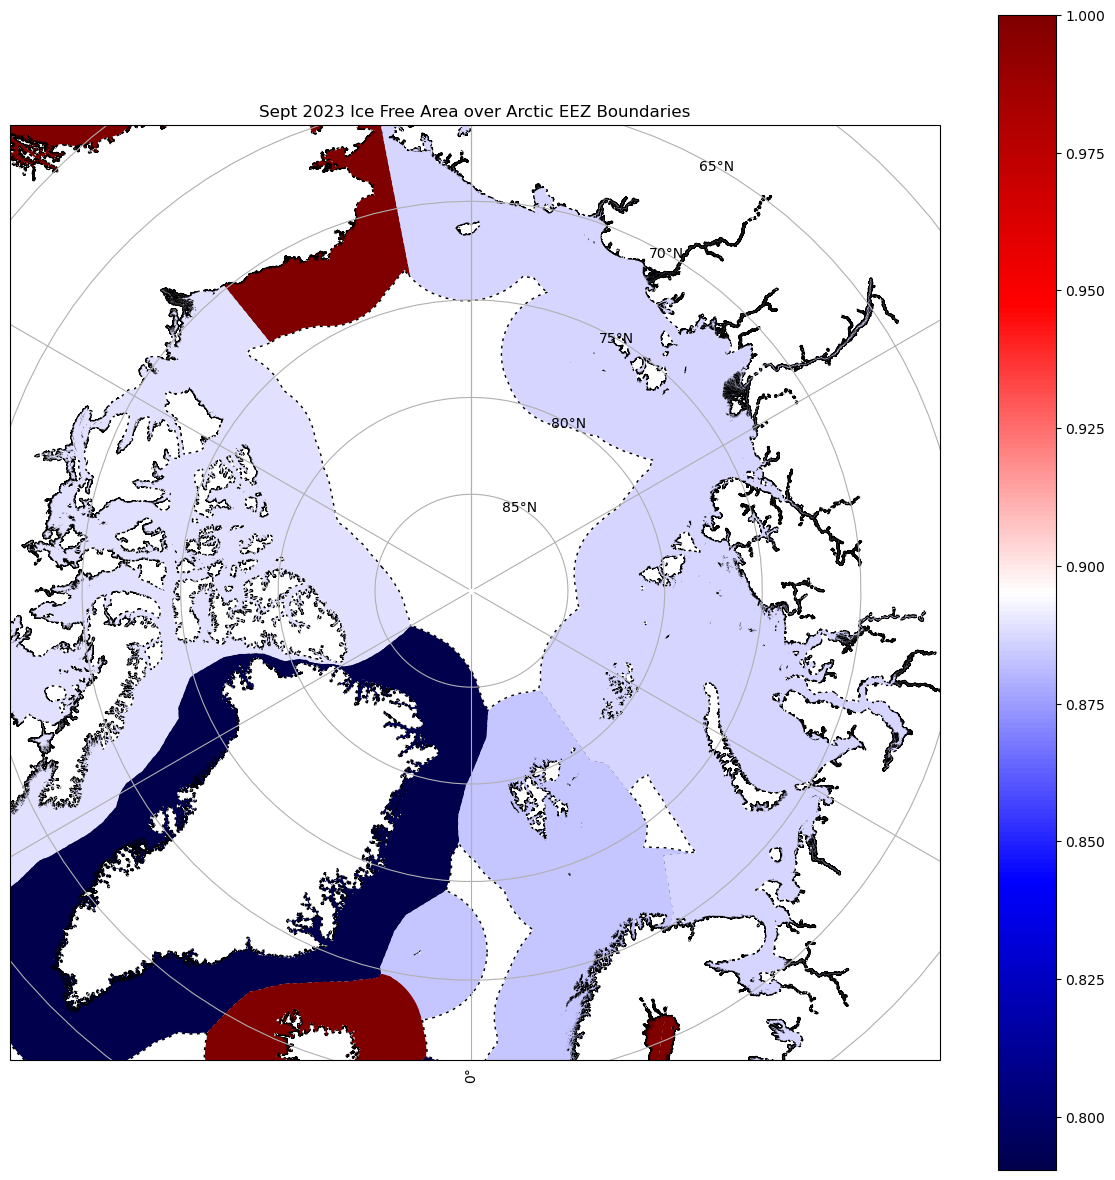

In [105]:
#Create choropleth map based on ice free area percentage of each Arctic State EEZ

#Define map projection
proj=ccrs.NorthPolarStereo(central_longitude=0)

#Create a figure with an axes object on which we will plot. Pass the projection to that axes.
fig, ax = plt.subplots(figsize=(15,15),subplot_kw=dict(projection=proj))

#Zoom in on Arctic Circle
ax.set_extent([0, 359, 66, 90], ccrs.PlateCarree())

#Add gridlines
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

#Add title
ax.set_title('Sept 2023 Ice Free Area over Arctic EEZ Boundaries')

cntry_eez_new.plot(ax=ax, color='white', edgecolor='black',linestyle=":", lw=2)
all_data.plot(ax=ax, column='ice free percentage', cmap='seismic',legend=True)